<a href="https://colab.research.google.com/github/Shafiq-Abdu/abdulrahman.github.io/blob/main/Supertrend_optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing packages and importing files

In [ ]:
!pip install backtrader==1.9.78.123
!pip install panda
!pip install numpy
!pip install matplotlib
!pip install yfinance
!pip install backtesting
!pip install ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7238 sha256=aa9370492e156066740548f81d18b756fbdaa557cca4ccb332370778391c30d2
  Stored in directory: /root/.cache/pip/wheels/0e/8b/c3/ff9cbde1fffd8071cff8367a86f0350a1ce30a8d31b6a432e9
Successfully built panda
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173916 sha256=a57f26758fde45166bcf90e17edc61f462ad6b99358414cfaa4973931c6947f6
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=372762015fb67f4da2cda4a1b09d4a3a7914ac9c1189069cb05c1903e

In [ ]:
pip install vectorbt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.1 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.41.1
    Uninstalling llvmlite-0.41.1:
      Successfully uninstalled llvmlite-0.41.1
  Attempting uninstall: numba
    Found existing installation: numba 0.58.1
    Uninstalling numba-0.58.1:
      Successfully uninstalled numba-0.58.1


In [ ]:
pip install numba

In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4473    0  4473    0     0  13518      0 --:--:-- --:--:-- --:--:-- 13513
100  517k  100  517k    0     0   554k      0 --:--:-- --:--:-- --:--:--  554k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4469    0  4469    0     0  10671      0 --:--:-- --:--:-- --:--:-- 10665
100  392k  100  392k    0     0   403k      0 --:--:-- --:--:-- --:--:--  403k


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import vectorbt as vbt

# Collect data

In [69]:
symbol1 = ['TCS.NS']
symbol2 = ['^NSEI']
symbol3 = ['AAPL']
symbol4 = ['META']
symbol5 = ['RELIANCE.NS']
symbol6 = ['HDB']
# symbol=symbol4                                            # Replace with your desired tickers
data = yf.download(symbol4, start='2023-01-01', end='2023-12-27', )
data.info() # data alone
# data


[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2023-01-03 to 2023-12-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       247 non-null    float64
 1   High       247 non-null    float64
 2   Low        247 non-null    float64
 3   Close      247 non-null    float64
 4   Adj Close  247 non-null    float64
 5   Volume     247 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.5 KB


In [71]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,122.820000,126.370003,122.279999,124.739998,124.739998,35528500
2023-01-04,127.379997,129.050003,125.849998,127.370003,127.370003,32397100
2023-01-05,126.129997,128.520004,124.540001,126.940002,126.940002,25447100
2023-01-06,128.970001,130.330002,126.040001,130.020004,130.020004,27584500
2023-01-09,131.160004,132.949997,129.279999,129.470001,129.470001,26649100
...,...,...,...,...,...,...
2023-12-19,345.579987,353.600006,345.119995,350.359985,350.359985,17729400
2023-12-20,348.649994,354.959991,347.790009,349.279999,349.279999,16369900
2023-12-21,352.980011,356.410004,349.209991,354.089996,354.089996,15289600


# Define Supertrend and strategy in five steps


SuperTrend is a trend-following indicator that uses Average True Range (ATR) and median price to define a set of upper and lower bands. Strategy: *When the close price crosses above the upper band, the asset is considered to be entering an uptrend, hence a buy signal. When the close price crosses below the lower band, the asset is considered to have exited the uptrend, hence a sell signal *

In [ ]:
# BASIC UPPERBAND = (HIGH + LOW) / 2 + Multiplier * ATR
# BASIC LOWERBAND = (HIGH + LOW) / 2 - Multiplier * ATR
# FINAL UPPERBAND = IF (Current BASICUPPERBAND < Previous FINAL UPPERBAND) or (Previous Close > Previous FINAL UPPERBAND)
#                   THEN Current BASIC UPPERBAND
#                   ELSE Previous FINAL UPPERBAND
# FINAL LOWERBAND = IF (Current BASIC LOWERBAND > Previous FINAL LOWERBAND) or (Previous Close < Previous FINAL LOWERBAND)
#                   THEN Current BASIC LOWERBAND
#                   ELSE Previous FINAL LOWERBAND
# SUPERTREND      = IF (Previous SUPERTREND == Previous FINAL UPPERBAND) and (Current Close <= Current FINAL UPPERBAND))
#                   THEN Current FINAL UPPERBAND
#                   ELIF (Previous SUPERTREND == Previous FINAL UPPERBAND) and (Current Close > Current FINAL UPPERBAND)
#                   THEN Current FINAL LOWERBAND
#                   ELIF (Previous SUPERTREND == Previous FINAL LOWERBAND) and (Current Close >= Current FINAL LOWERBAND)
#                   THEN Current FINAL LOWERBAND
#                   ELIF (Previous SUPERTREND == Previous FINAL LOWERBAND) and (Current Close < Current FINAL LOWERBAND)
#                   THEN Current FINAL UPPERBAND

In [72]:
high = data.get('High')
low = data.get('Low')
close = data.get('Close')
print(close)

Date
2023-01-03    124.739998
2023-01-04    127.370003
2023-01-05    126.940002
2023-01-06    130.020004
2023-01-09    129.470001
                 ...    
2023-12-19    350.359985
2023-12-20    349.279999
2023-12-21    354.089996
2023-12-22    353.390015
2023-12-26    354.829987
Name: Close, Length: 247, dtype: float64


Get 1.ATR , 2.Median price,    3. Basic bands , 4.Final Bands and define supertrend strategy.

In [56]:
def get_med_price(high, low):
    return (high + low) / 2

def get_atr(high, low, close, period):
    tr0 = abs(high - low)
    tr1 = abs(high - close.shift())
    tr2 = abs(low - close.shift())
    tr = pd.concat((tr0, tr1, tr2), axis=1).max(axis=1)
    atr = tr.ewm(alpha=1 / period, adjust=False, min_periods=period).mean()
    return atr

def get_basic_bands(med_price, atr, multiplier):
    matr = multiplier * atr
    upper = med_price + matr
    lower = med_price - matr
    return upper, lower

def get_final_bands(close, upper, lower):
    trend = pd.Series(np.full(close.shape, np.nan), index=close.index)
    dir_ = pd.Series(np.full(close.shape, 1), index=close.index)
    long = pd.Series(np.full(close.shape, np.nan), index=close.index)
    short = pd.Series(np.full(close.shape, np.nan), index=close.index)

    for i in range(1, close.shape[0]):
        if close.iloc[i] > upper.iloc[i - 1]:
            dir_.iloc[i] = 1
        elif close.iloc[i] < lower.iloc[i - 1]:
            dir_.iloc[i] = -1
        else:
            dir_.iloc[i] = dir_.iloc[i - 1]
            if dir_.iloc[i] > 0 and lower.iloc[i] < lower.iloc[i - 1]:
                lower.iloc[i] = lower.iloc[i - 1]
            if dir_.iloc[i] < 0 and upper.iloc[i] > upper.iloc[i - 1]:
                upper.iloc[i] = upper.iloc[i - 1]

        if dir_.iloc[i] > 0:
            trend.iloc[i] = long.iloc[i] = lower.iloc[i]
        else:
            trend.iloc[i] = short.iloc[i] = upper.iloc[i]

    return trend, dir_, long, short

def supertrend(high, low, close, period=10, multiplier=3):                              #Using default parameters period and mutiplier.    atr for legth of 10 d and a multipier of 3
    med_price = get_med_price(high, low)
    atr = get_atr(high, low, close, period)
    upper, lower = get_basic_bands(med_price, atr, multiplier)
    return get_final_bands(close, upper, lower)

In [76]:
supert, superd, superl, supers = supertrend(high, low,close)
print(supert)   #rolling period is 10  so first 9 will be NaN

  #t strategy ,signal d,long (uptrend) l, short (downtrend) s

Date
2023-01-03           NaN
2023-01-04           NaN
2023-01-05           NaN
2023-01-06           NaN
2023-01-09           NaN
                 ...    
2023-12-19    323.672649
2023-12-20    326.105389
2023-12-21    327.907344
2023-12-22    330.003615
2023-12-26    332.352260
Length: 247, dtype: float64


In [ ]:
superd.tail()

# *Plot for any month*

In [79]:
# date_range = slice('2023-01-01', '2023-12-01')
# plt.style.use('dark_background')

# fig, ax = plt.subplots(figsize=(12, 6))  # Create a figure and axes

# # Plot Close price
# close.loc[date_range,'META'].rename('Close').plot(ax=ax,color='orange')

# # Plot Short signal
# supers.loc[date_range].rename('Short').plot(ax=ax,color='green' )  # Use dashed line for visual distinction

# # Plot Long signal
# superl.loc[date_range].rename('Long').plot(ax=ax,color='red' )  # Use dotted line for distinction

# plt.grid(True)
# plt.legend()  # Add legend
# plt.show()  # Display the plot

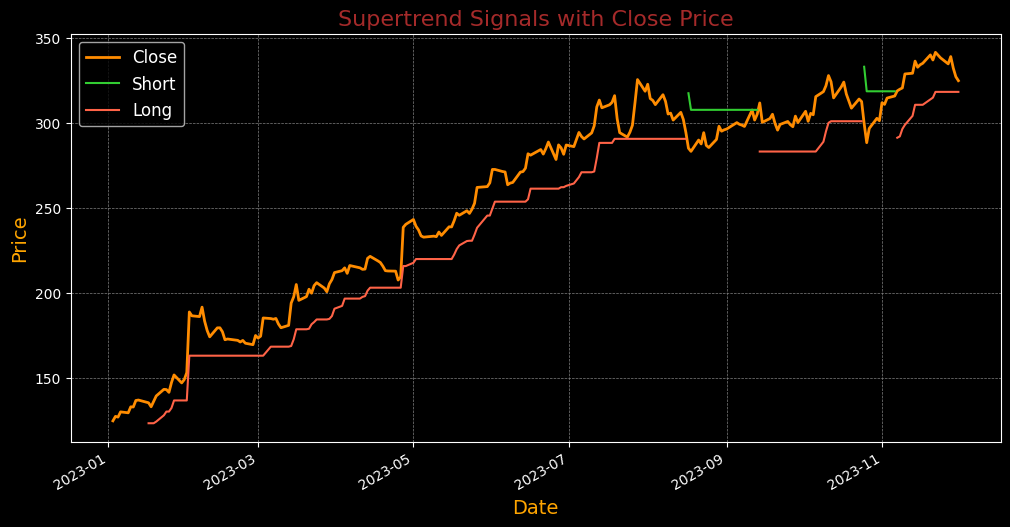

In [91]:
date_range = slice('2023-1-01', '2023-12-01')
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(12, 6))

# Access Close price using the correct column name
close_price = data.loc[date_range, 'Close']  # Assuming 'Close' is the correct column name
close_price.plot(ax=ax, color='darkorange',linewidth=2)  # Plot directly

# Plot signals (assuming variables are defined correctly)
supers.loc[date_range].rename('Short').plot(ax=ax, color='limegreen', )
superl.loc[date_range].rename('Long').plot(ax=ax, color='tomato',)


# supers.loc[date_range].rename('Short').plot(
#     ax=ax, color='limegreen', linestyle='--', marker='v', markersize=2
# )

# # Plot Long signal (customize line style, color, and marker)
# superl.loc[date_range].rename('Long').plot(
#     ax=ax, color='tomato', linestyle=':', marker='^', markersize=2)


plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left', frameon=True, fontsize=12)
plt.title("Supertrend Signals with Close Price", fontsize=16,color='brown')
plt.xlabel("Date", fontsize=14,color='orange')
plt.ylabel("Price", fontsize=14,color='orange')
plt.show()

# Backtesting

In [ ]:
pip install pandas pandas-ta

In [95]:
entries = (~superl.isnull()).vbt.signals.fshift()
exits = (~supers.isnull()).vbt.signals.fshift()

In [96]:
pf = vbt.Portfolio.from_signals(
    close=close,
    entries=entries,
    exits=exits,
    fees=0.001,  #commission 0.1%:
)

In [99]:
pf.stats()

/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'sharpe_ratio' requires frequency to be set
  warnings.warn(warning_message)
/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'calmar_ratio' requires frequency to be set
  warnings.warn(warning_message)
/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'omega_ratio' requires frequency to be set
  warnings.warn(warning_message)
/usr/local/lib/python3.10/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'sortino_ratio' requires frequency to be set
  warnings.warn(warning_message)


Start                         2023-01-03 00:00:00
End                           2023-12-26 00:00:00
Period                                        247
Start Value                                 100.0
End Value                              210.000673
Total Return [%]                       110.000673
Benchmark Return [%]                   184.455662
Max Gross Exposure [%]                      100.0
Total Fees Paid                          1.347334
Max Drawdown [%]                        17.380484
Max Drawdown Duration                       104.0
Total Trades                                    4
Total Closed Trades                             3
Total Open Trades                               1
Open Trade PnL                           2.438146
Win Rate [%]                            66.666667
Best Trade [%]                         112.624959
Worst Trade [%]                         -4.178566
Avg Winning Trade [%]                   57.276209
Avg Losing Trade [%]                    -4.178566


# Optimisation

In [100]:
period_values = np.arange(2, 21)  # Adjust range as needed
multiplier_values = np.arange(2, 10)  # Adjust range as needed
params_grid = np.array(np.meshgrid(period_values, multiplier_values)).T.reshape(-1, 2)

Optimal Code

In [105]:
best_sharpe_ratio = -np.inf
best_params = None

for params in params_grid:
    period, multiplier = params

    # Calculate Supertrend
    supert, superd, superl, supers = supertrend(high, low, close, period, multiplier)

    # Generate signals and backtest
    entries = (~superl.isnull()).vbt.signals.fshift()
    exits = (~supers.isnull()).vbt.signals.fshift()
    pf = vbt.Portfolio.from_signals(close, entries, exits, fees=0.001, freq='1d')

    # Evaluate performance
    sharpe_ratio = pf.sharpe_ratio()  # Assuming vbt has a method for Sharpe ratio

    # Update best parameters if necessary
    if sharpe_ratio > best_sharpe_ratio:
        best_sharpe_ratio = sharpe_ratio
        best_params = params

# Print best parameters
print("Best parameters:", best_params)

Best parameters: [2 5]


In [106]:
sharpe_ratio

2.8711467330504106

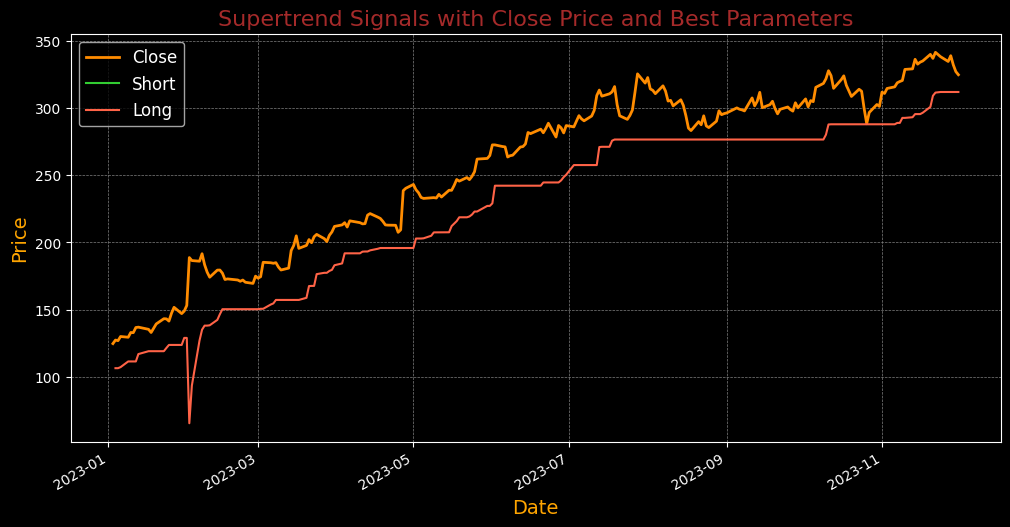

In [108]:
best_period, best_multiplier = best_params

supert, superd, superl, supers = supertrend(high, low, close,best_period, best_multiplier)

date_range = slice('2023-01-01', '2023-12-01')
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))  # Create a figure and axes

close_price = data.loc[date_range, 'Close']  # Assuming 'Close' is the correct column name
close_price.plot(ax=ax, color='darkorange',linewidth=2)  # Plot directly

# Plot signals (assuming variables are defined correctly)
supers.loc[date_range].rename('Short').plot(ax=ax, color='limegreen', )
superl.loc[date_range].rename('Long').plot(ax=ax, color='tomato',)

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left', frameon=True, fontsize=12)
plt.title("Supertrend Signals with Close Price and Best Parameters", fontsize=16,color='brown')
plt.xlabel("Date", fontsize=14,color='orange')
plt.ylabel("Price", fontsize=14,color='orange')
plt.show()

Play with parameters

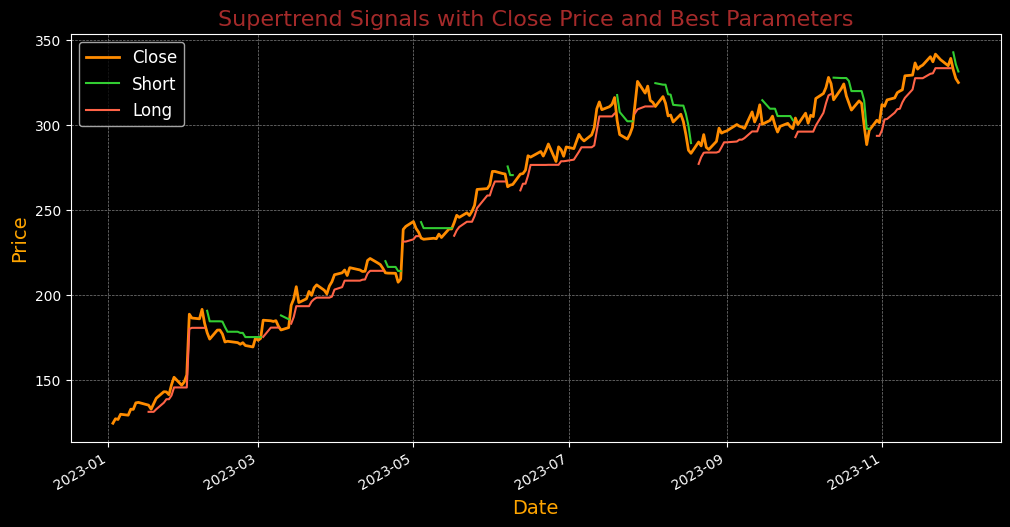

In [114]:
supert, superd, superl, supers = supertrend(high, low, close,10,1)

date_range = slice('2023-01-01', '2023-12-01')
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))  # Create a figure and axes

close_price = data.loc[date_range, 'Close']  # Assuming 'Close' is the correct column name
close_price.plot(ax=ax, color='darkorange',linewidth=2)  # Plot directly

# Plot signals (assuming variables are defined correctly)
supers.loc[date_range].rename('Short').plot(ax=ax, color='limegreen', )
superl.loc[date_range].rename('Long').plot(ax=ax, color='tomato',)

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left', frameon=True, fontsize=12)
plt.title("Supertrend Signals with Close Price and Best Parameters", fontsize=16,color='brown')
plt.xlabel("Date", fontsize=14,color='orange')
plt.ylabel("Price", fontsize=14,color='orange')
plt.show()